In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)

In [15]:
df = pd.read_csv("adults.csv")
df = df.drop("Unnamed: 0",axis=1)

## Understand the data

In [16]:
# First 5 rows.
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# Data information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


- 32560 records, 15 features, 6 numerical features, 9 categorical features

### Describtive statistics


In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


- age mean is nearly 38
- most records are 10 years education years
- most of records works in full time jobs 40 hours weekly
- the younger record is 17 
- the lowest education years is 1
- the lowest weekly work hours is 1
- 50 % of records are below 40 years old
- 50 % of records are below 40 years oldworking in full time jobs
- max education years is 16 
- max weekly work hours is 99

In [6]:
df.describe(include=["O"])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


- most are work in private work class
- most are high school grads
- most are married from civillian spouse
- most of occupations is profissional speciality
- most of the data are males

# Data Cleaning

### Missing values

In [17]:
# first I will make little edit on df
df = pd.read_csv( "adults.csv",na_values=["Unknown","unknown", "? ", " ?"])
df = df.drop("Unnamed: 0",axis =1)

In [18]:
# Now the nans should be shown.
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

#### Deal with missing values
for this situation i will use fill with the value before.

In [19]:
missing = [feature for feature in df.columns if df[feature].isnull().any() == True]
for feature in missing:
    df[feature] = df[feature].fillna(method="pad")

In [20]:
# Check again:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

#### Missing values filled.

## Check & Drop  duplicates:

In [50]:
df.duplicated().sum()

24

In [21]:
df = df.drop_duplicates()

## Check for outliers.


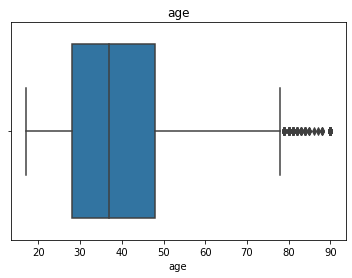

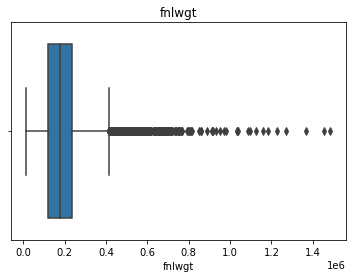

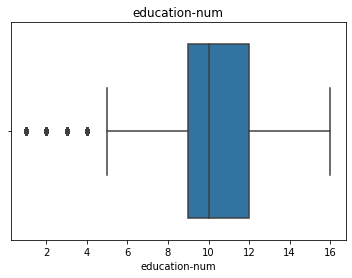

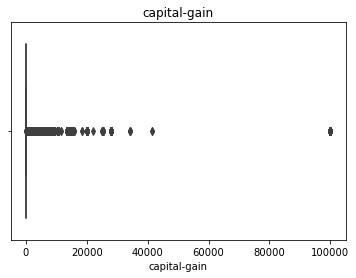

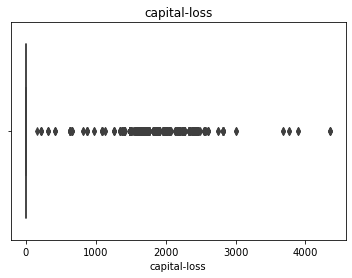

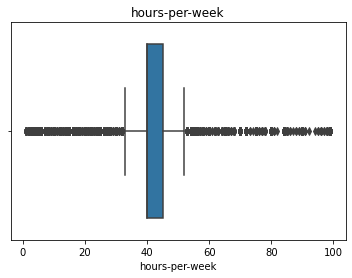

In [23]:
for feature in df.columns:
    if df[feature].dtypes != "O":
        sns.boxplot(data=df, x=feature)
        plt.title(feature)
        plt.show()

In [45]:
df.kurtosis()

age                -0.166127
fnlwgt              6.218811
education-num       0.623444
capital-gain      154.799438
capital-loss       20.376802
hours-per-week      2.916687
dtype: float64

- the accepted value for kurtosis is between -3 and 3, so everything seems like ok.

- fnlwgt contains outliers, but i will leave since it doesn't make any impact to the model

### Remove white spaces:

In [22]:
for feature in df.columns:
    if df[feature].dtypes == "O":
        df[feature] = df[feature].str.strip()
    else:
        pass

### Remove redundant categories:


#### Marital-status

In [23]:
# Merge all marriage situations into one value.
df.loc[(df["marital-status"] == 'Married-civ-spouse')|(df["marital-status"] == 'Married-spouse-absent')|(df["marital-status"] == 'Married-AF-spouse'), "marital-status"] = "Married"

### Education

In [24]:
df.loc[(df["education"] == "1st-4th")|(df["education"] == "5th-6th"),"education"] = "elementary"

In [25]:
df.loc[(df["education"] == "7th-8th")|(df["education"] == "9th"),"education"] = "intermediate"
df.loc[(df["education"] == "10th")|(df["education"] == "11th")|(df["education"] == "12th"),"education"] = "some HS"
df.loc[(df["education"] == "Assoc-voc")|(df["education"] == "Assoc-acdm"),"education"] = "associate"

#### Education Cleaned

## native-country:

In [26]:
df.loc[df["native-country"] != "United-States", "native-country"] = "other"

## EDA :

In [27]:
continues_features = [feature for feature in df.columns if df[feature].dtypes != "O" and len(df[feature].unique())> 20]
discrete_features = [feature for feature in df.columns if df[feature].dtypes != "O" and len(df[feature].unique())< 20]
catigorical_features = [feature for feature in df.columns if df[feature].dtypes == "O"]

#### Distributions:

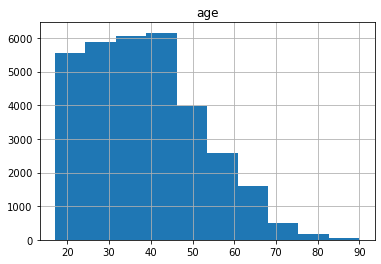

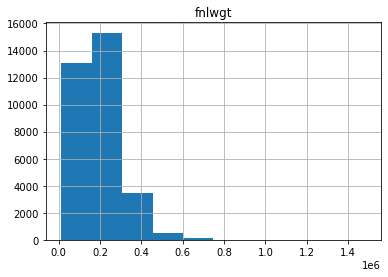

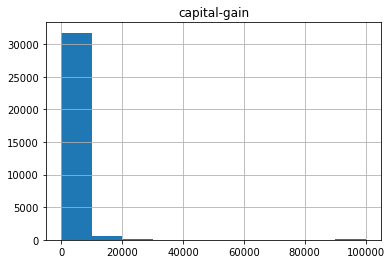

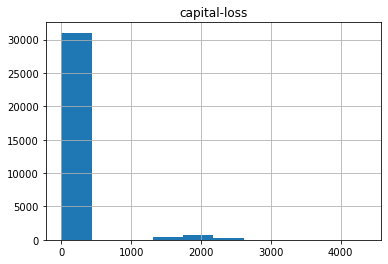

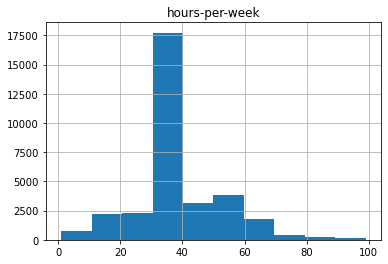

In [60]:
for feature in continues_features:
    df[feature].hist()
    plt.title(feature)
    plt.show()

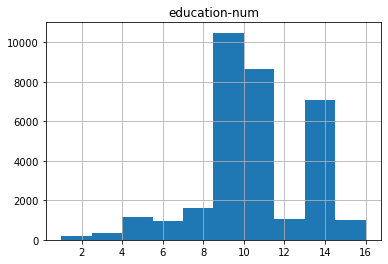

In [61]:
for feature in discrete_features:
    df[feature].hist()
    plt.title(feature)
    plt.show()

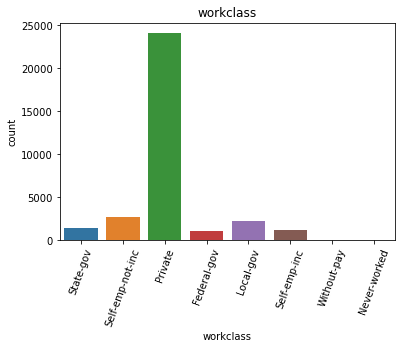

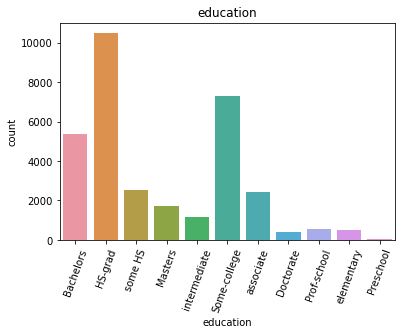

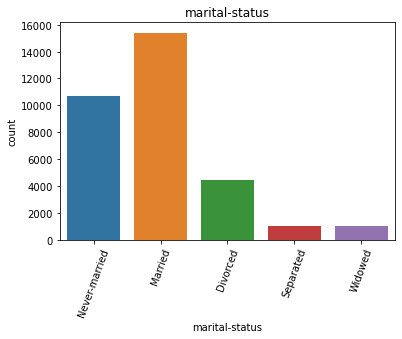

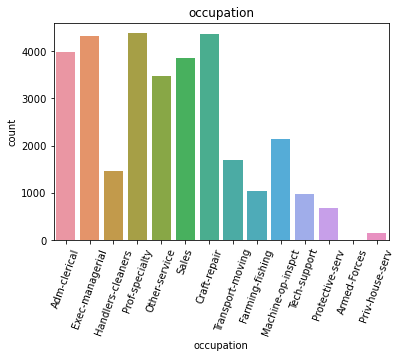

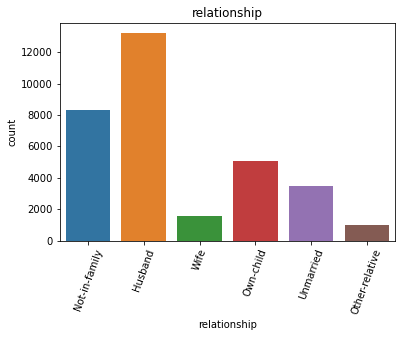

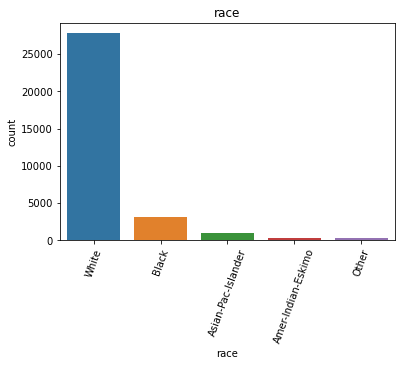

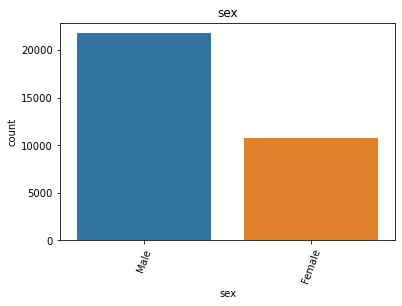

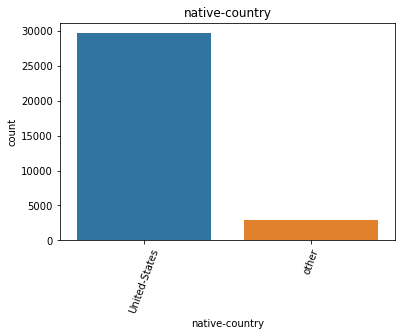

In [62]:
for feature in catigorical_features:
    if feature == "income":
        pass
    else:
        sns.countplot(data=df,x=feature)
        plt.xticks(rotation=70)
        plt.title(feature)
        plt.show()
        

###### Categorical features vs income

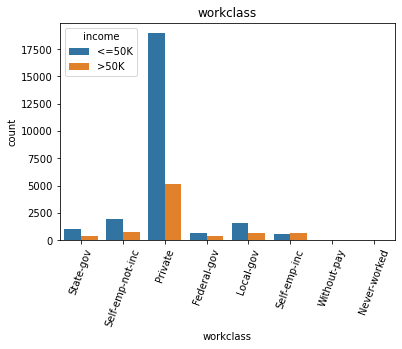

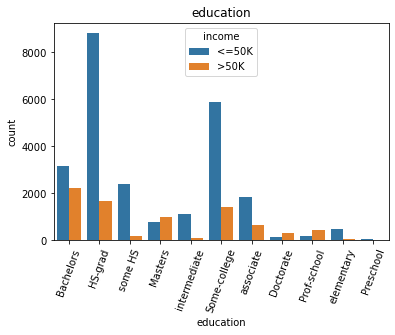

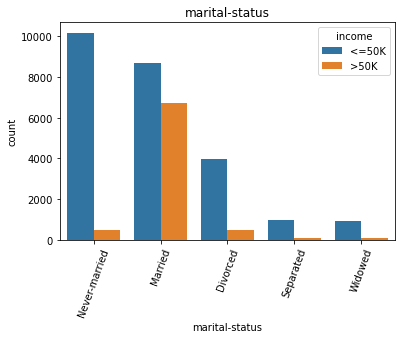

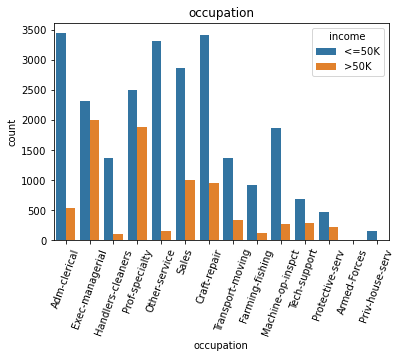

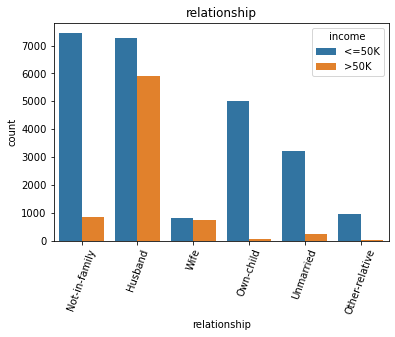

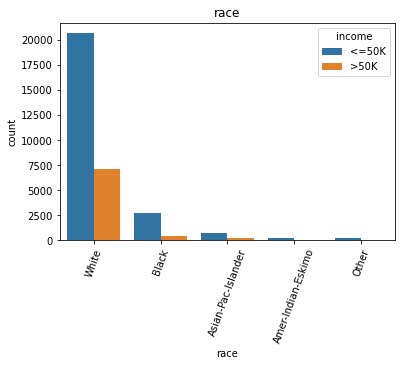

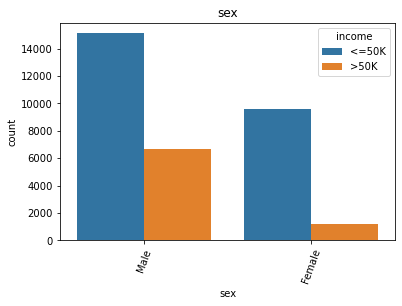

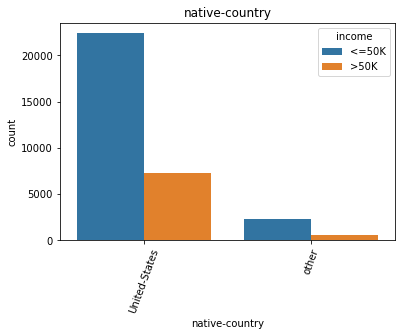

In [63]:
for feature in catigorical_features:
    if feature == "income":
        pass
    else:
        sns.countplot(data=df,x=feature,hue="income")
        plt.xticks(rotation=70)
        plt.title(feature)
        plt.show()

- The private workers have the highest income 
- there's no significant differnces in income between employees in federal-gov and self-emp-inc
- The bachelors degree holders has the most income
- the married adults have the more highest income
- the managerial roles have the highest paying
- there's no that much differnce between number of adults who works in managerial skills and profissional specialities
- males earn more than females
- in united states there's significant differences between people who earn more than 50k and less than 50k

## Probability Distributions

### PDFs

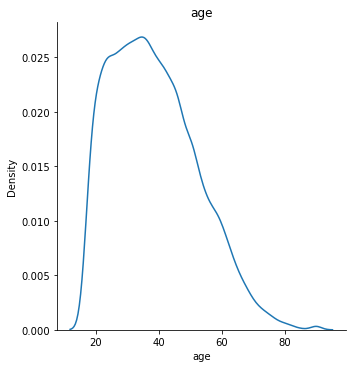

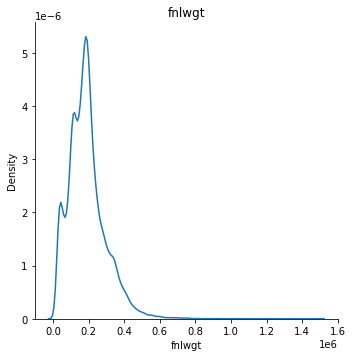

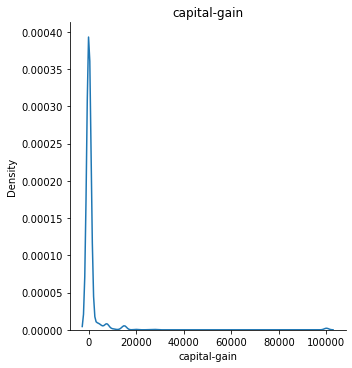

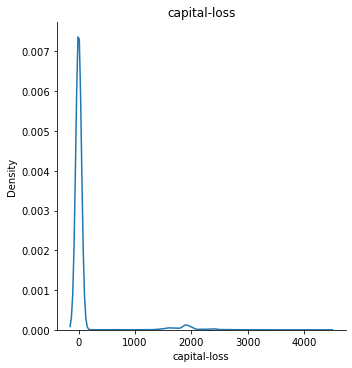

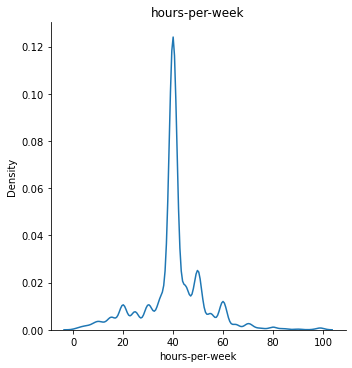

In [64]:
for feature in continues_features:
    sns.displot(data=df, x=feature,kind="kde")
    plt.title(feature)
    plt.show()

### ECDFs

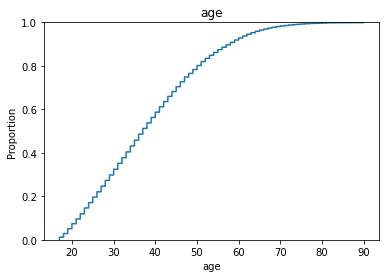

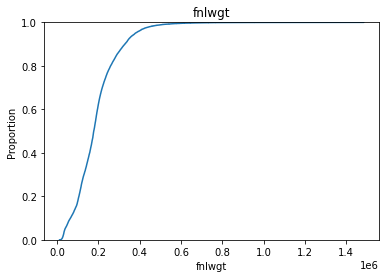

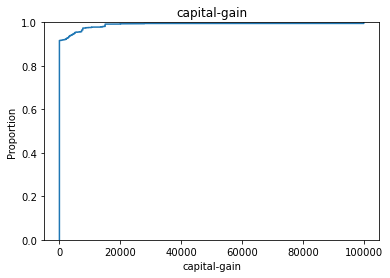

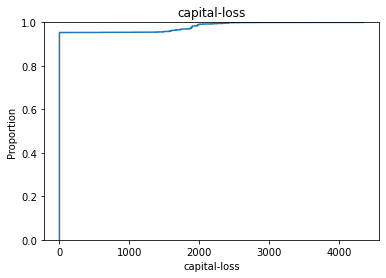

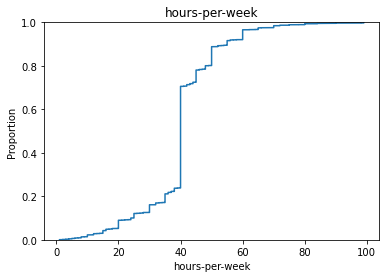

In [65]:
for feature in continues_features:
    sns.ecdfplot(data=df,x=feature)
    plt.title(feature)
    plt.show()

- more than 50% of the data has 11 edducation years
- 70% of the data works in full time jobs

### Correlations

<AxesSubplot:>

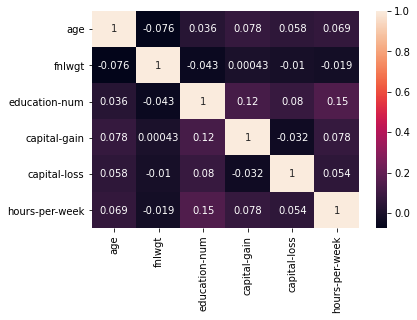

In [66]:
sns.heatmap(df.corr(),annot=True)

In [83]:
# Check for significant correlated features with income
from scipy.stats import chi2_contingency
for feature in catigorical_features:
    if feature == "income":
        pass
    else:
        table = pd.crosstab(df[feature],df["income"])
        c, p, dof, expected = chi2_contingency(table)
        print(feature, p)

workclass 9.912936252395006e-173
education 0.0
marital-status 0.0
occupation 0.0
relationship 0.0
race 2.2797874171824478e-70
sex 0.0
native-country 5.106578341531153e-12


- the p-values shows that race and work class is independent from target variable, which means that i had better drop them or the model will not go as i need

# Feature Engineering

In [28]:
df = df.drop(["workclass","race","native-country"],axis=1)

In [29]:
df["income"] = df["income"].map({"<=50K":0,">50K":1})


In [30]:
df.head()

,age,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,income
0,39,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,0
1,50,83311,Bachelors,13,Married,Exec-managerial,Husband,Male,0,0,13,0
2,38,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,0
3,53,234721,some HS,7,Married,Handlers-cleaners,Husband,Male,0,0,40,0
4,28,338409,Bachelors,13,Married,Prof-specialty,Wife,Female,0,0,40,0


In [31]:
# drop irrelevant features
df = df.drop("fnlwgt",axis=1)

#### Scaling:

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[["age","education-num","capital-gain","capital-loss","hours-per-week"]])

MinMaxScaler()

In [33]:
df[["age","education-num","capital-gain","capital-loss","hours-per-week"]] = scaler.transform(df[["age","education-num","capital-gain","capital-loss","hours-per-week"]])

#### Categorical variables encoding

In [34]:
df["sex"] = df["sex"].map({"Male":0,"Female":1})

In [35]:
# For other variables i will use ordinal encoder which perform better on ordinal categories
from sklearn.preprocessing import OrdinalEncoder
encode = OrdinalEncoder()
encode.fit(df[["education","marital-status","occupation","relationship"]])

OrdinalEncoder()

In [36]:
df[["education","marital-status","occupation","relationship"]] = encode.transform(df[["education","marital-status","occupation","relationship"]])

#### Splitting & Oversampling to fix imbalance data


In [37]:

x = df.drop("income",axis=1)
y = df[["income"]]

In [38]:
# Splitting:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [39]:
# Fix Imbalanced data:
x = pd.concat([X_train, y_train], axis=1)
minority = df[df["income"] == 1]
majority = df[df["income"] == 0]
from sklearn.utils import resample
minority_upsampled = resample(minority,
                          replace=True, # sample with replacement
                          n_samples=len(majority), # match number in majority class
                          random_state=40) # reproducible results
upsampled_data = pd.concat([minority_upsampled,majority])


In [40]:
# Check!
upsampled_data.income.value_counts()

1    24698
0    24698
Name: income, dtype: int64

In [41]:
X_train = upsampled_data.drop("income",axis=1)
y_train = upsampled_data[["income"]]

# Model Building:

### Logistic Regression:

In [50]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)
y_pred = log.predict(X_test)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Model Evaluation

In [110]:
from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(y_test,y_pred))
f1_score(y_test,y_pred)

[[5641 1764]
 [ 507 1850]]


0.6196616982080054

- Bad Score, I'll try other model.

## KNNs

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

<ipython-input-42-a90be746a646>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y_train)


In [43]:
knn.score(X_test,y_test)

0.8434746978078262

# RandomForest

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

<ipython-input-44-5cbfe7ae52d1>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


In [45]:
rf.score(X_test,y_test)

0.942020077852899

## Model Evaluation:

#### -For the evaluation i will use crass_val_score

In [47]:
from sklearn.model_selection import cross_val_score


In [58]:
models = [str(log),str(knn),str(rf)]
#scores = []
#for model in models:
    #score = cross_val_score(model,X_train,y_train,cv=5)
    #scores.append(np.mean(score))

In [55]:
scores

[0.7662968415806973, 0.8361405127549422, 0.9051541588442831]

In [59]:
model_scores = pd.DataFrame({"model":models,"Score":scores})

In [60]:
model_scores

,model,Score
0,LogisticRegression(),0.766297
1,KNeighborsClassifier(),0.836141
2,RandomForestClassifier(),0.905154


#### So, RandomForest is the best model for our problem.

## Nice, The model performs well.
## Thanks for joining me.